In [24]:
#pip install scikit-plot

In [53]:
#Dependencies 
import tensorflow as tf
from keras.models import Sequential
from keras.utils import to_categorical
from keras import utils as np_utils
from keras.layers import Dense
from keras.callbacks import EarlyStopping

# Clean and Preprocess Data for Machine Learning
import numpy as np
import pandas as pd

#Graphing dependencies 
import matplotlib.pyplot as plt
%matplotlib inline
import scikitplot as skplt

In [54]:
#Import and create DataFrames
kderby_stats = pd.read_csv('K_Derby_Stats_2019-2008.csv')
kderby_placing_order = pd.read_csv('Kentucky_Derby_Placing_Order2008-2019.csv')

In [55]:
kderby_stats_df = pd.DataFrame(kderby_stats) 
kderby_placing_order_df = pd.DataFrame(kderby_placing_order) 

In [56]:
# Merge CSV's to create one dataframe 
merge_tables = pd.merge(kderby_stats_df, kderby_placing_order_df, how='left', left_on=['Horse','Year'], right_on = ['Horse','Year'])
merge_tables.head()


,Year,Post_Position,WinnersatPost_last49yrs,ITM,Starters,ITM%atPost_last49yrs,Horse,Morning _Line,Derby_Points,Trainer,...,Dam,Dams_Sire,Tomlinson_DST,Tomlinson_Wet,BRIS_Pace,AWD_Sire,AWD_Dams_Sire,LastPrep_Finish,Dosage_Index,Finish_Position
0,2019,1,1,6.0,47.0,13%,War of Will,15-1,60,Casse,...,Visions of Clarity,Sadler's Wells,370.0,329.0,117.0,7.3,10.7,"9th, Louisiana Derby",1.72,7.0
1,2019,2,4,12.0,49.0,24%,Tax,20-1,52,Gargan,...,Toll,Giant's Causeway,338.0,405.0,116.0,7.9,8.1,"2nd, Wood Memorial",1.56,14.0
2,2019,3,4,11.0,49.0,22%,By My Standards,15-1,100,Calhoun,...,A Jealous Woman,Muqtarib,252.0,292.0,104.0,6.3,5.8,"1st, Louisiana Derby",3.00,11.0
3,2019,4,6,9.0,49.0,18%,Gray Magician,50-1,41,Miller,...,Burg Berg,Johannesburg,227.0,393.0,105.0,6.7,7,"2nd, UAE Derby",5.00,19.0
4,2019,5,6,13.0,49.0,27%,Improbable,1-May,65,Baffert,...,Rare Event,A.P. Indy,308.0,443.0,112.0,6.5,8.2,"2nd, Arkansas Derby",4.23,4.0


In [57]:
#create new dataframe with only the desired columns, create a bin, and drop na  
bins = [1, 3, 9, 12, 18, 20]
labels = ["1","2","3", "4", "5"]
merge_tables['Place_Bins'] = pd.cut(merge_tables['Finish_Position'], bins=bins, labels=labels)
merge_tables.head()

,Year,Post_Position,WinnersatPost_last49yrs,ITM,Starters,ITM%atPost_last49yrs,Horse,Morning _Line,Derby_Points,Trainer,...,Dams_Sire,Tomlinson_DST,Tomlinson_Wet,BRIS_Pace,AWD_Sire,AWD_Dams_Sire,LastPrep_Finish,Dosage_Index,Finish_Position,Place_Bins
0,2019,1,1,6.0,47.0,13%,War of Will,15-1,60,Casse,...,Sadler's Wells,370.0,329.0,117.0,7.3,10.7,"9th, Louisiana Derby",1.72,7.0,2
1,2019,2,4,12.0,49.0,24%,Tax,20-1,52,Gargan,...,Giant's Causeway,338.0,405.0,116.0,7.9,8.1,"2nd, Wood Memorial",1.56,14.0,4
2,2019,3,4,11.0,49.0,22%,By My Standards,15-1,100,Calhoun,...,Muqtarib,252.0,292.0,104.0,6.3,5.8,"1st, Louisiana Derby",3.00,11.0,3
3,2019,4,6,9.0,49.0,18%,Gray Magician,50-1,41,Miller,...,Johannesburg,227.0,393.0,105.0,6.7,7,"2nd, UAE Derby",5.00,19.0,5
4,2019,5,6,13.0,49.0,27%,Improbable,1-May,65,Baffert,...,A.P. Indy,308.0,443.0,112.0,6.5,8.2,"2nd, Arkansas Derby",4.23,4.0,2


In [58]:
new_table = merge_tables[['Starters', 'Dosage_Index', 'Place_Bins']].dropna()
new_table.isnull().values.any()

False

In [59]:
#new_table['Place_Bins'] = new_table['Place_Bins'].astype(float)
new_table['Place_Bins'] = pd.to_numeric(new_table['Place_Bins'],errors='coerce')


In [60]:
new_table.dtypes

Starters        float64
Dosage_Index    float64
Place_Bins        int64
dtype: object

In [61]:
X = new_table[["Starters","Dosage_Index"]]
y = new_table[["Place_Bins"]]

In [62]:
#plt.scatter(X, X, c=y)

In [63]:
print(X.shape, y.shape)

(178, 2) (178, 1)


In [64]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, stratify=y)

In [65]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [66]:
classifier.fit(X_train, y_train)

//anaconda3/envs/PythonData/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
//anaconda3/envs/PythonData/lib/python3.6/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
//anaconda3/envs/PythonData/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [67]:
#Validate the model using the test data
print(f"Training Data Score: {classifier.score(X_train, y_train)}")
print(f"Testing Data Score: {classifier.score(X_test, y_test)}")

Training Data Score: 0.39849624060150374
Testing Data Score: 0.37777777777777777


In [68]:
#Make predictions using Logistic Regression Model
predictions = classifier.predict(X_test)
print(f"First 10 Predictions: {predictions[:10]}")
print(f"First 10 Actual labels: {y_test[:10].values.tolist()}")

First 10 Predictions: [4 4 2 2 2 2 2 4 2 4]
First 10 Actual labels: [[2], [4], [5], [2], [2], [4], [2], [4], [1], [4]]


In [69]:
#p_r = predictions.reshape((-1, 1))
y_r = y_test.values.reshape((45))

In [70]:
predictions = classifier.predict(X_test)
#pd.DataFrame.from_dict({"Prediction": predictions, "Actual": y_r})

prediction_df = pd.DataFrame({"Prediction": predictions, "Actual": y_r})
prediction_df

,Prediction,Actual
0,4,2
1,4,4
2,2,5
3,2,2
4,2,2
5,2,4
6,2,2
7,4,4
8,2,1
9,4,4


In [71]:
from sklearn.metrics import mean_squared_error

MSE = mean_squared_error(y_test, predictions)
r2 = classifier.score(X_test, y_test)

print(f"MSE: {MSE}, R2: {r2}")

MSE: 2.2, R2: 0.37777777777777777


In [72]:
#Predict_Proba
probability_class_1 = classifier.predict_proba(X_test)
print(f"First 3 Predictions: {probability_class_1[:10]}")
print(f"First 10 Actual labels: {y_test[:10].values.tolist()}")

First 3 Predictions: [[0.12234642 0.25882648 0.14978008 0.3525593  0.11648773]
 [0.08369297 0.29848268 0.15844491 0.38669153 0.07268791]
 [0.0551158  0.37463131 0.17740007 0.36000111 0.03285171]
 [0.18492758 0.36441891 0.20558296 0.18419316 0.06087739]
 [0.16030203 0.35465884 0.19737335 0.22296514 0.06470064]
 [0.14085799 0.38194232 0.20493505 0.22115698 0.05110766]
 [0.14264284 0.33630727 0.18655132 0.26271362 0.07178495]
 [0.09299303 0.30126866 0.16186812 0.36817405 0.07569613]
 [0.10321835 0.36612568 0.19021125 0.28944846 0.05099626]
 [0.06471773 0.22798248 0.12494781 0.47681308 0.1055389 ]]
First 10 Actual labels: [[2], [4], [5], [2], [2], [4], [2], [4], [1], [4]]


//anaconda3/envs/PythonData/lib/python3.6/site-packages/sklearn/utils/deprecation.py:85: DeprecationWarning: Function plot_precision_recall_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_precision_recall instead.
  warnings.warn(msg, category=DeprecationWarning)


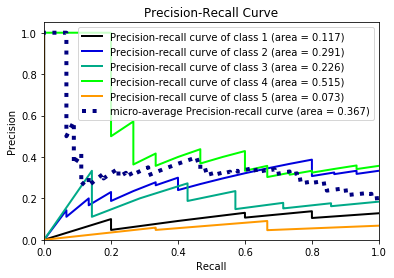

In [81]:
# Plot.
skplt.metrics.plot_precision_recall_curve(y_test, probability_class_1)

plt.show()

In [73]:
# Save the model
import pickle
filename = 'finalized_winning_horsemodel.sav'
pickle.dump(classifier, open(filename, 'wb'))

In [74]:
# How to load the model from disk (perhaps at a later date when needed):   
 loaded_model = pickle.load(open(filename, 'rb'))
 result = loaded_model.score(X_test, y_test)
 print(result)

0.37777777777777777


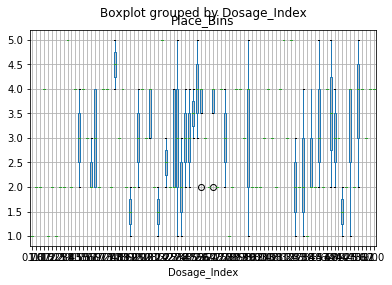

In [75]:
new_table.boxplot(column="Place_Bins",by="Dosage_Index")

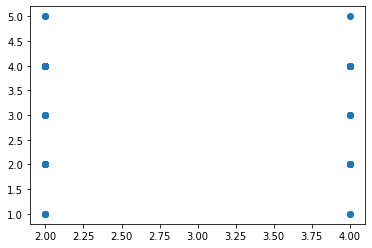

In [76]:
# Basic chart
plt.plot('Prediction', 'Actual', data=prediction_df, linestyle='none', marker='o')

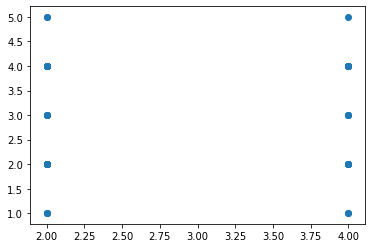

In [77]:
plt.scatter(prediction_df.Prediction, prediction_df.Actual)

ValueError: Found input variables with inconsistent numbers of samples: [178, 45]

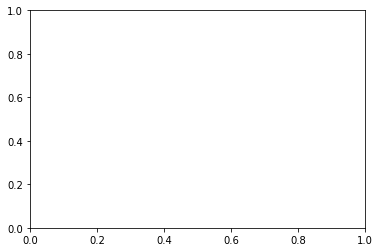

In [78]:
skplt.metrics.plot_confusion_matrix(y, predictions, normalize=True)
plt.show()

NameError: name 'keras_clf' is not defined